## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
#
# Your code to import matplotlib, pandas and numpy libraries
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
#
# Your code to print shapes of training and test data. Check how the data looks
#

x_train.shape, y_train.shape


((50000, 32, 32, 3), (50000, 1))

In [4]:
# Your code to print the shape of one image.
x_train[1].shape, x_test[1].shape

((32, 32, 3), (32, 32, 3))

# Your code to show any sample image in the dataset. Use - plt.imshow()

plt.imshow(x_train[0])

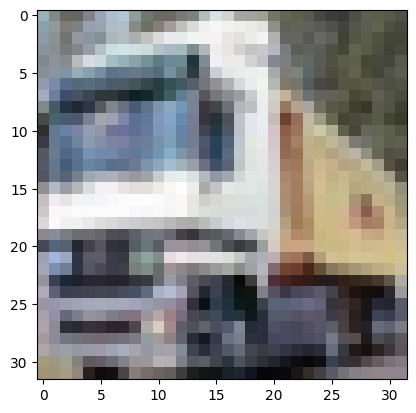

In [6]:
# Show any other image
plt.imshow(x_train[1])

# PreProcessing

In [7]:
# Your code to print one image in digitals. Check how pixels look like.
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
# Your code to print shape of any image i.e particular value in the x_train
x_train[0].shape


(32, 32, 3)

In [9]:
# Your code to print the maximum value in x_train. Hint - Use .max()
x_train.max()

255

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
# Print the shape of x_train again.
x_train.shape

(50000, 32, 32, 3)

In [12]:
# Print the shape of y_train again.

y_train.shape

(50000, 1)

# One hot vector encoding.
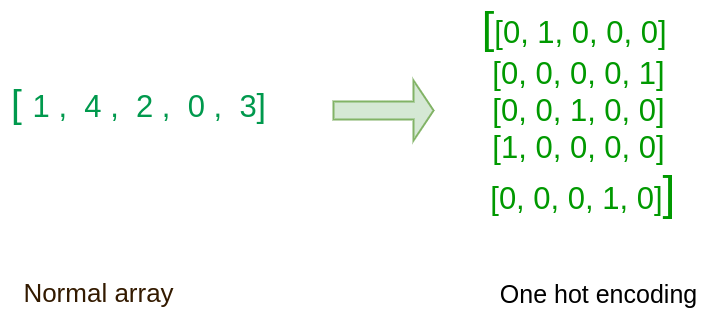


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [13]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]

y_train[0].shape

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train

y_cat_train = to_categorical(y_train, 10)
y_train.shape,y_cat_train.shape

((50000, 1), (50000, 10))

In [14]:
# Your code to print shape of the array y_cat_train
y_cat_train.shape

(50000, 10)

In [15]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_cat_train[0])
print(y_train[0])
# Compare the result for better understanding of "to_categorical()"

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[6]


In [16]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test, 10)
# Print the shapes to look how y_cat_test looks.

y_cat_test.shape


(10000, 10)

----------
# Building the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [18]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
#

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))



model.add(Flatten())

#
# Add few dense layers.
#
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))



/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       160,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,194 (703.88 KB)

 Trainable params: 180,194 (703.88 KB)

 Non-trainable params: 0 (0.00 B)

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [23]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [24]:
y_cat_test.shape

(10000, 10)

In [25]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping.
# use 'history' array to save the training parameters for each epoch

history = model.fit(x_train, y_cat_train, callbacks=[early_stop], epochs=10,validation_data=(x_test, y_cat_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3561 - loss: 1.7624 - val_accuracy: 0.5382 - val_loss: 1.2978
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5604 - loss: 1.2333 - val_accuracy: 0.5917 - val_loss: 1.1482
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6190 - loss: 1.0811 - val_accuracy: 0.6105 - val_loss: 1.1281
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6563 - loss: 0.9797 - val_accuracy: 0.6469 - val_loss: 1.0105
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6909 - loss: 0.8861 - val_accuracy: 0.6593 - val_loss: 0.9811
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7180 - loss: 0.8162 - val_accuracy: 0.6566 - val_loss: 0.9925
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7349 - loss: 0.7568 - val_accuracy: 0.6689 - val_loss: 0.9579
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7575 -

### We can save the model in a file. Following code shows how to do this.

In [26]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this.

In [27]:
losses = pd.DataFrame(model.history.history)

In [28]:
# Print first few rows of losses.
losses.head(5)

,accuracy,loss,val_accuracy,val_loss
0,0.44552,1.536511,0.5382,1.297821
1,0.57326,1.204621,0.5917,1.148153
2,0.62254,1.072971,0.6105,1.128074
3,0.65924,0.972860,0.6469,1.010526
4,0.68978,0.891831,0.6593,0.981128


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs)
### y axis will have accuracy and val_accuracy





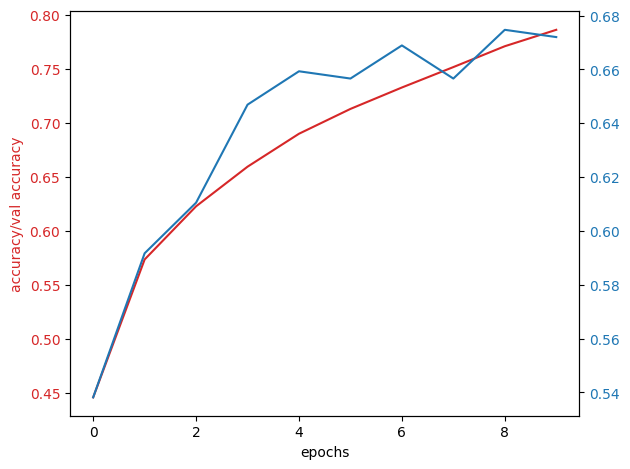

In [29]:
#
# Your code to plot accuracy and val_accuracy vs the epochs
#
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy/val accuracy', color=color)
ax1.plot(losses.index, losses['accuracy'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(losses.index, losses['val_accuracy'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

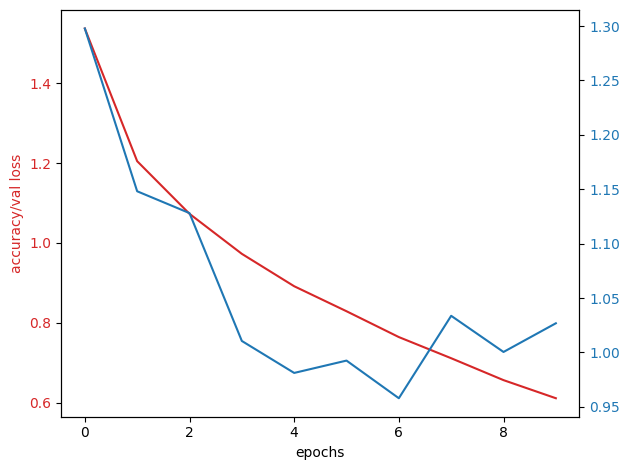

In [30]:
#
# Your code to plot loss and val_loss vs the epochs
#

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy/val loss', color=color)
ax1.plot(losses.index, losses['loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(losses.index, losses['val_loss'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

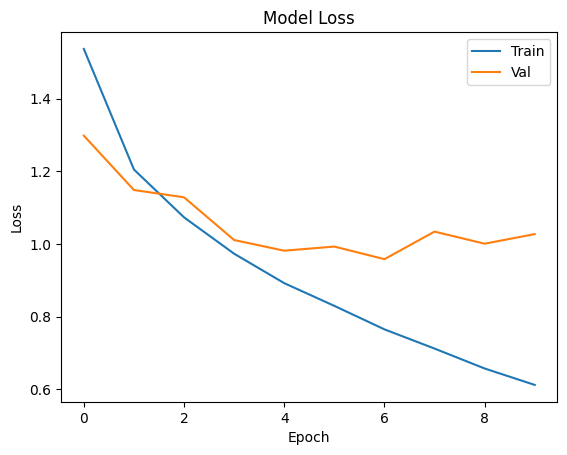

In [44]:
#graphical representation depicting the train loss and validation loss trends.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [ ]:
# Based on this analysis, determine the optimal number of epochs for training your model.

# Your answer here


### You could print the metrics name that model have used.

### Following code shows how to do this.

In [31]:
model.metrics_names

['loss', 'compile_metrics']

### Following code shows how to evaluate your model.

In [32]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0267871618270874, 0.671999990940094]

### Make a prediction on test data set.   

In [33]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


### We could get the full classification report.

In [34]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report


In [35]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.76      0.68      0.72      1000\n           1       0.77      0.84      0.80      1000\n           2       0.66      0.49      0.56      1000\n           3       0.48      0.48      0.48      1000\n           4       0.59      0.62      0.61      1000\n           5       0.52      0.64      0.57      1000\n           6       0.82      0.70      0.76      1000\n           7       0.66      0.78      0.71      1000\n           8       0.81      0.74      0.77      1000\n           9       0.73      0.76      0.74      1000\n\n    accuracy                           0.67     10000\n   macro avg       0.68      0.67      0.67     10000\nweighted avg       0.68      0.67      0.67     10000\n'

### We could also get and plot confusion matrix.

https://github.com/matplotlib/matplotlib/issues/14751

In [36]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,predictions)

array([[679,  37,  40,  15,  40,  15,   8,  34,  78,  54],
       [ 12, 838,   7,   8,   4,  11,   5,   7,  17,  91],
       [ 46,   9, 487,  93, 119, 102,  63,  53,  15,  13],
       [ 13,  15,  40, 480,  78, 239,  33,  60,  14,  28],
       [ 22,   7,  39,  72, 620,  65,  27, 127,  11,  10],
       [  4,   5,  44, 151,  51, 644,   9,  78,   8,   6],
       [  4,  11,  34,  91,  67,  61, 700,  14,   6,  12],
       [  7,   7,  22,  46,  40,  75,   3, 776,   3,  21],
       [ 86,  48,  12,  26,  18,  13,   5,   8, 736,  48],
       [ 22, 117,  11,  22,   9,  15,   1,  19,  24, 760]])

<Axes: >

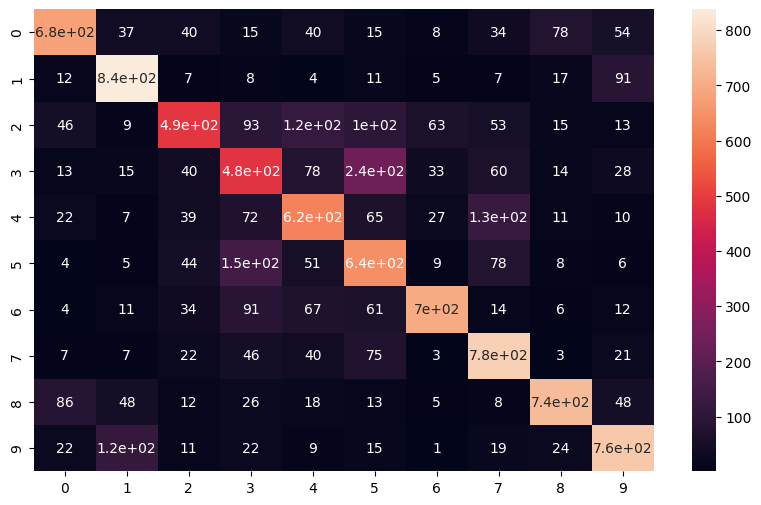

In [38]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [39]:
my_image = x_test[16]

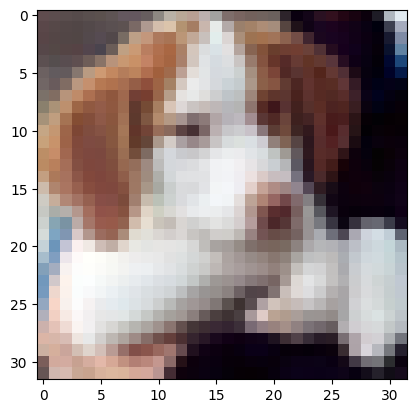

In [40]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[2.3820094e-07, 1.0376964e-05, 7.3716481e-05, 2.2778019e-02,
        8.6120679e-07, 9.7683161e-01, 2.7821065e-05, 2.5492735e-04,
        1.9237448e-05, 3.1962641e-06]], dtype=float32)

In [45]:
# Find the highest probability value in the vector above.
# What output value does it point to?

model.predict(my_image.reshape(1,32,32,3)).argmax()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


5

In [46]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([5])

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


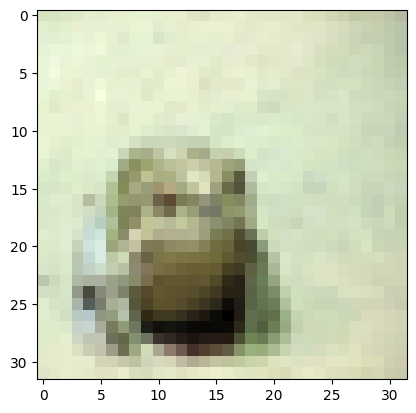

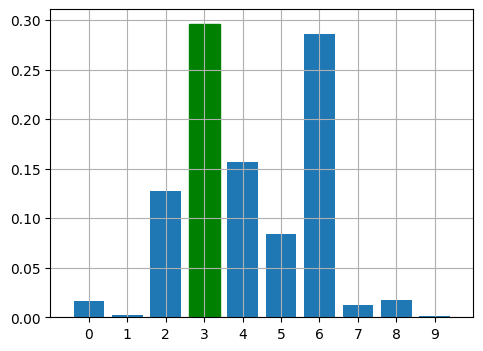

The predicted answer: cat 
 Correct answer: frog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [48]:
from tensorflow.keras.preprocessing.image import array_to_img
import random

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras.

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8492 - loss: 0.4391 - val_accuracy: 0.6755 - val_loss: 1.2155
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8687 - loss: 0.3865 - val_accuracy: 0.6761 - val_loss: 1.2414
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8710 - loss: 0.3800 - val_accuracy: 0.6779 - val_loss: 1.2546
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8332 - loss: 0.4756 - val_accuracy: 0.6524 - val_loss: 1.3264
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8479 - loss: 0.4391 - val_accuracy: 0.6519 - val_loss: 1.4178
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8554 - loss: 0.4212 - val_accuracy: 0.6454 - val_loss: 1.5163
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9026 - loss: 0.2944 - val_accuracy: 0.6783 - val_loss: 1.3112
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9204 - loss: 0

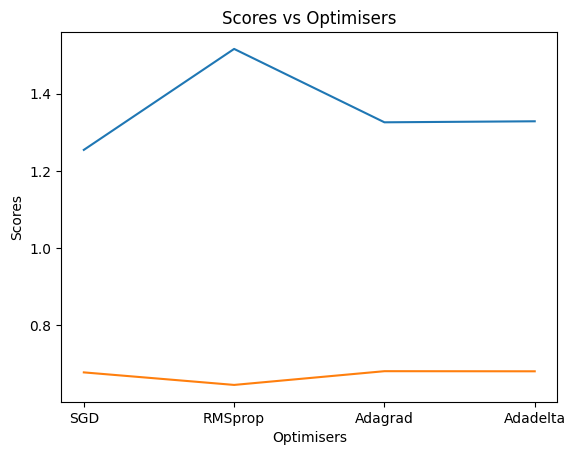

In [50]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
optimisers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',]

scores = []

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

for optimiser in optimisers:
      model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
      model.fit(x_train, y_cat_train, epochs=3,validation_data=(x_test, y_cat_test))
      scores.append(model.evaluate(x_test,y_cat_test,verbose=0))

# Plot score vs optimiser
plt.plot(optimisers, scores)
plt.xlabel('Optimisers')
plt.ylabel('Scores')
plt.title('Scores vs Optimisers')
plt.show()

# Lab logbook requirement:
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends.
# Based on this analysis, determine the optimal number of epochs for training your model.